In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import *
import xgboost as xgb
from sklearn.linear_model import Ridge,LinearRegression,Lasso, LogisticRegression
from sklearn.decomposition import PCA,SparsePCA
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('\\Machine learning datasets\\Behavior of the urban traffic of the city of Sao Paulo in Brazil')

In [3]:
df = pd.read_csv('city.csv')

In [4]:
df.head()

,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 17 columns):
Immobilized bus                          135 non-null int64
Broken Truck                             135 non-null int64
Vehicle excess                           135 non-null int64
Accident victim                          135 non-null int64
Running over                             135 non-null int64
Fire vehicles                            135 non-null int64
Occurrence involving freight             135 non-null int64
Incident involving dangerous freight     135 non-null int64
Lack of electricity                      135 non-null int64
Fire                                     135 non-null int64
Point of flooding                        135 non-null int64
Manifestations                           135 non-null int64
Defect in the network of trolleybuses    135 non-null int64
Tree on the road                         135 non-null int64
Semaphore off                            135 non-null i

In [6]:
df.describe()

,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,9.622222
std,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.377464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
max,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.000000


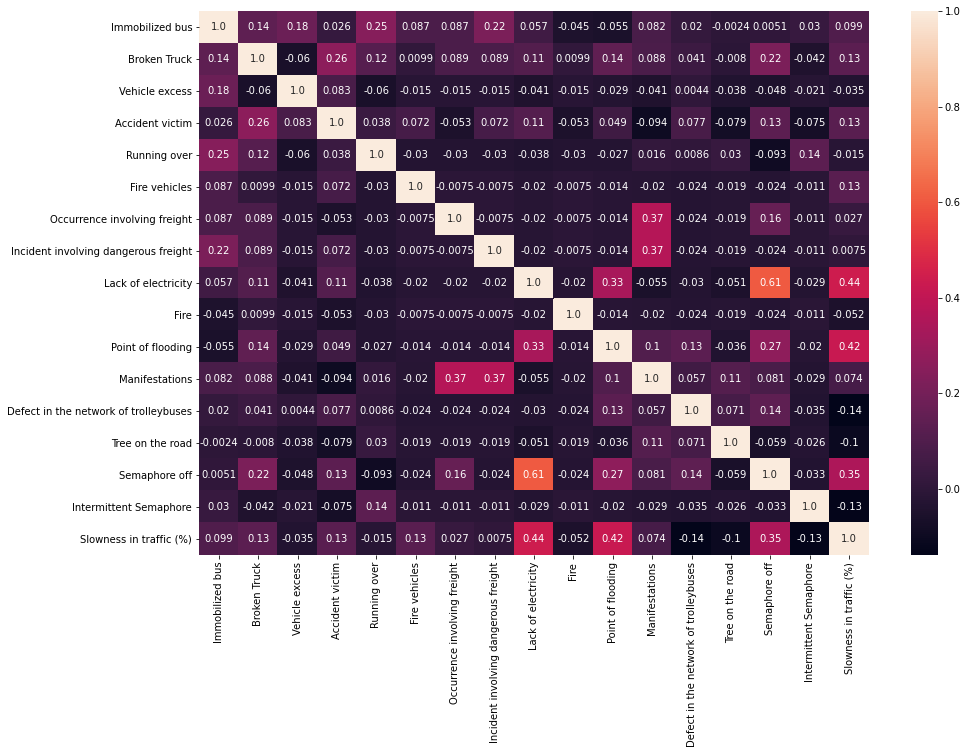

In [7]:
# visualize heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

mean:  9.622222222222222
median:  9.0


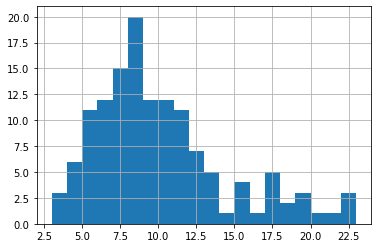

In [8]:
# histogram
slow = df['Slowness in traffic (%)']
df['Slowness in traffic (%)'].hist(bins=20)
print('mean: ',slow.mean())
print('median: ',slow.median())
# the distribution is not normaly distributed but it is still ok with few outliers as 
# the mean and median is close

['Lack of electricity', 'Point of flooding', 'Semaphore off', 'Broken Truck', 'Accident victim', 'Fire vehicles']


C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matpl

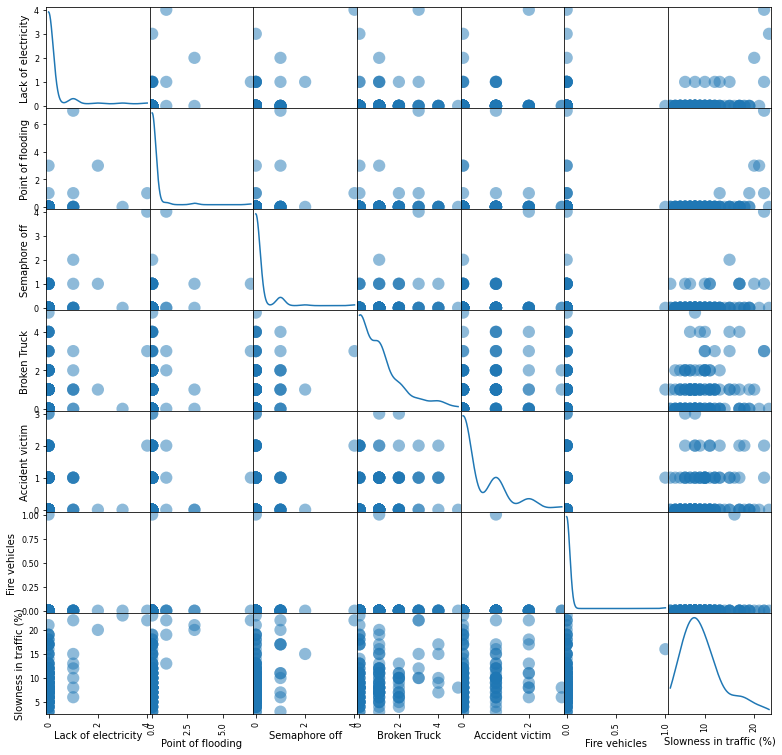

In [13]:
# plot scatter matrix 
cols = ['Lack of electricity', 'Point of flooding', 'Semaphore off',
        'Broken Truck', 'Accident victim', 'Fire vehicles','Slowness in traffic (%)']
pd.plotting.scatter_matrix(df[cols],alpha=0.5,figsize=(13,13),diagonal='kde',s=600);
x = df.drop("Slowness in traffic (%)",axis=1).values
y = df["Slowness in traffic (%)"].values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.2)

In [14]:
# build regressor model
def regressor(xtrain,ytrain,model,params):
    cv = GridSearchCV(model,param_grid=params,cv=3).fit(xtrain,ytrain)
    print('Best Params: ',cv.best_params_)
    print('Best Score: ',cv.best_score_)

In [16]:
print('Lasso')
lasso = regressor(xtrain,ytrain,Lasso(random_state=0),params={'alpha':[0.1,0.3,0.5,0.7,0.9]})
print()

print('Ridge')
ridge = regressor(xtrain,ytrain,Ridge(random_state=0),params={'alpha':[0.1,0.3,0.5,0.7,0.9]})
print()

print('Linear Regressor')
lr = LinearRegression().fit(xtrain,ytrain)
print('Train score: ',lr.score(xtrain,ytrain))
print('Test score: ',lr.score(xtest,ytest))
print()

print('SVM')
svmre = regressor(xtrain,ytrain,SVR(),params={'gamma':[0.1,0.2,0.4,0.8,1,31.5],
                                     'C':[0.3,0.5,0.8,1,1.5,1.8,2.0]})
print()

print('KNN')
knnre = regressor(xtrain,ytrain,KNeighborsRegressor(),params={'n_neighbors':[1,2,3,4,5,6]})
print()

print('Random Forest')
rfre = regressor(xtrain,ytrain,RandomForestRegressor(random_state=1),
          params={'max_depth':[3,4,5,6],
                 'n_estimators':[100,150,200,250],
                 'min_samples_split':[2,3,4,5],
                 'min_samples_leaf':[2,3,4,5]})
print()

print('Gradient Boosting')
gbre = regressor(xtrain,ytrain,GradientBoostingRegressor(random_state=1),
          params={'max_depth':[3,4,5,6],
                 'n_estimators':[100,150,200,250],
                 'min_samples_split':[2,3,4,5],
                 'min_samples_leaf':[2,3,4,5],
                 'learning_rate':[0.001,0.01,0.1]})
print()

print('AdaBoost')
adaboostre = regressor(xtrain,ytrain,AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),random_state=1),
          params={'n_estimators':[100,150,200,250],
                 'learning_rate':[0.001,0.01,0.1]})

Lasso
Best Params:  {'alpha': 0.1}
Best Score:  0.14260798432141286

Ridge
Best Params:  {'alpha': 0.9}
Best Score:  0.14045528197996604

Linear Regressor
Train score:  0.36903890700455655
Test score:  0.03556544182186816

SVM
Best Params:  {'C': 2.0, 'gamma': 0.1}
Best Score:  0.08420452287542128

KNN
Best Params:  {'n_neighbors': 3}
Best Score:  0.10364893965399098

Random Forest
Best Params:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score:  0.20690176577932998

Gradient Boosting
Best Params:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 250}
Best Score:  0.26557104076714616

AdaBoost
Best Params:  {'learning_rate': 0.001, 'n_estimators': 250}
Best Score:  0.1357146990024325


In [17]:
# regressors do not return satisfactory results then we will try in classification model
# cut the y to 3 bins then convert into classifiction problems
# 0 , low - slowness
# 1 , medium - slowness
# 2 , high - slowness
df['Slowness in traffic (%)'] = pd.cut(df['Slowness in traffic (%)'],3,labels=[0,1,2])

C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matpl

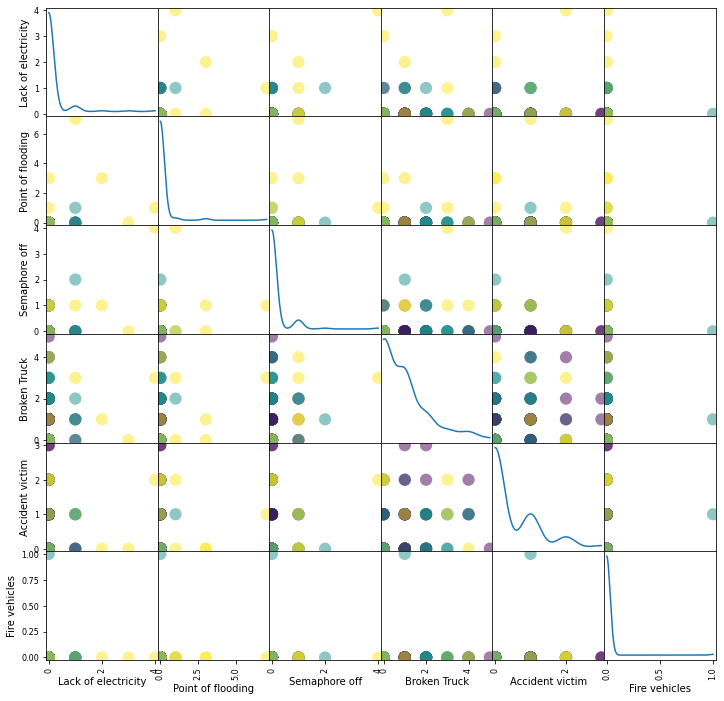

In [18]:
co = ['Lack of electricity', 'Point of flooding', 'Semaphore off',
        'Broken Truck', 'Accident victim', 'Fire vehicles','Slowness in traffic (%)']
pd.plotting.scatter_matrix(df[co]
                           ,figsize=(12,12)
                           ,diagonal='kde'
                           ,c=df['Slowness in traffic (%)']
                           ,s=600);

In [19]:
selected_columns = ['Lack of electricity', 'Point of flooding',
        'Broken Truck', 'Semaphore off']
# x = df[selected_columns].values
x = df.drop("Slowness in traffic (%)",axis=1).values
y = df["Slowness in traffic (%)"].values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.2)

In [20]:
# build classification model
def clf(xtrain,ytrain,model,params):
    cv = GridSearchCV(model,param_grid=params,cv=3).fit(xtrain,ytrain)
    print('Best Params: ',cv.best_params_)
    print('Best Score: ',cv.best_score_)

In [21]:
print('logistic regression')
lg = LogisticRegression(penalty='l2').fit(xtrain,ytrain)
print('Train score: ',lg.score(xtrain,ytrain))
print('Test score: ',lg.score(xtest,ytest))
print()

print('KNN')
knnclf = clf(xtrain,ytrain,KNeighborsClassifier(weights='distance'),params={'n_neighbors':[2,3,4,5,6,7,8,9]})
print()

print('SVM')
svc = clf(xtrain,ytrain,SVC(),params={'gamma':[0.1,0.2,0.4,0.8,1,1.5],
                                     'C':[0.3,0.5,0.8,1,1.5,1.8,2.0]})
print()


print('Random Forest Classifier')
rfclf = clf(xtrain,ytrain,RandomForestClassifier(random_state=1),
          params={'max_depth':[3,4,5,6],
                 'n_estimators':[100,150,200,250],
                 'min_samples_split':[2,3,4,5],
                 'min_samples_leaf':[2,3,4,5]})
print()


print('Gradient Boosting Classifier')
gbclf = clf(xtrain,ytrain,GradientBoostingClassifier(random_state=1),
          params={'max_depth':[3,4,5,6],
                 'n_estimators':[100,150,200,250],
                 'learning_rate':[0.001,0.01,0.1]})
print()


print('XGBoost')
xgboot =xgb.XGBClassifier(random_state=0,learning_rate=0.01,max_depth=5,gamma=0.5,eta=0.1) 
xgboot.fit(xtrain,ytrain)
print('Train score: ',xgboot.score(xtrain,ytrain))
print('Test score: ',xgboot.score(xtest,ytest))
print()

      
print('AdaBoost')
adaboostclf = clf(xtrain,ytrain,AdaBoostClassifier(random_state=1),
          params={'n_estimators':[100,150,200,250],
                 'learning_rate':[0.001,0.01,0.1]})

# the results are much better than the regression model

logistic regression
Train score:  0.6944444444444444
Test score:  0.48148148148148145

KNN
Best Params:  {'n_neighbors': 3}
Best Score:  0.5925925925925926

SVM
Best Params:  {'C': 1.5, 'gamma': 0.1}
Best Score:  0.6203703703703703

Random Forest Classifier
Best Params:  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.6203703703703703

Gradient Boosting Classifier
Best Params:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
Best Score:  0.611111111111111

XGBoost
Train score:  0.75
Test score:  0.37037037037037035

AdaBoost
Best Params:  {'learning_rate': 0.01, 'n_estimators': 100}
Best Score:  0.6481481481481481


In [22]:
# let's pick up the few most performed models and to do further tuning and feature engineering
adaboost = AdaBoostClassifier(random_state=1,learning_rate=0.01,n_estimators=100).fit(xtrain,ytrain)
print('Adaboost - Testing score',adaboost.score(xtest,ytest))
print()

gbdt = GradientBoostingClassifier(random_state=1,learning_rate=0.01,max_depth=3,n_estimators=150).fit(xtrain,ytrain)
print('GradientBoost - Testing score',gbdt.score(xtest,ytest))
print()

svm = SVC(C=1,gamma=0.2).fit(xtrain,ytrain)
print('SVM - Testing score',svm.score(xtest,ytest))
print()

knn = KNeighborsClassifier(n_neighbors=2).fit(xtrain,ytrain)
print('KNN - Testing score',knn.score(xtest,ytest))
print()

lg = LogisticRegression(penalty='l2').fit(xtrain,ytrain)
print('LogisticRegression - Testing score',lg.score(xtest,ytest))
print()

Adaboost - Testing score 0.4074074074074074

GradientBoost - Testing score 0.4074074074074074

SVM - Testing score 0.4444444444444444

KNN - Testing score 0.37037037037037035

LogisticRegression - Testing score 0.48148148148148145



0.5555555555555556

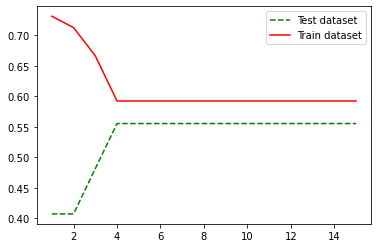

In [24]:
# lets adjust hyperparameters for the XGBoost
test_scores = []
train_scores = []
gamma = []
for i in range(1,16):
    xgboost =xgb.XGBClassifier(random_state=0,learning_rate=0.01,max_depth=5,gamma=i,eta=0.1).fit(xtrain,ytrain) 
    train_scores.append(xgboost.score(xtrain,ytrain))
    test_scores.append(xgboost.score(xtest,ytest))
    gamma.append(i)
plt.plot(range(1,16),test_scores,'g--',label='Test dataset')
plt.plot(range(1,16),train_scores,'r-',label='Train dataset')
plt.legend()
# gamma 4 achieved the best result with test accuracy around 55%
# selected features have reached  to the bottleneck of the model so more feature engineering will be needed
# as to go above 55% is near impossible
xgboost =xgb.XGBClassifier(random_state=0,learning_rate=0.01,max_depth=5,gamma=4,eta=0.1).fit(xtrain,ytrain)
xgboost.score(xtest,ytest)

In [26]:
# use feature selection method in sklearn
importances = xgboost.feature_importances_
idx = (-importances).argsort()[:6]
sel_mod = SelectFromModel(xgboost,threshold=0.001).fit_transform(xtrain,ytrain)
names_features = np.array(df.columns)[idx]
print('Selected features', names_features)

Selected features ['Broken Truck' 'Semaphore off' 'Point of flooding' 'Immobilized bus'
 'Vehicle excess' 'Accident victim']


C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jiawy\Anaconda3\lib\site-packages\pandas\plotting\_matpl

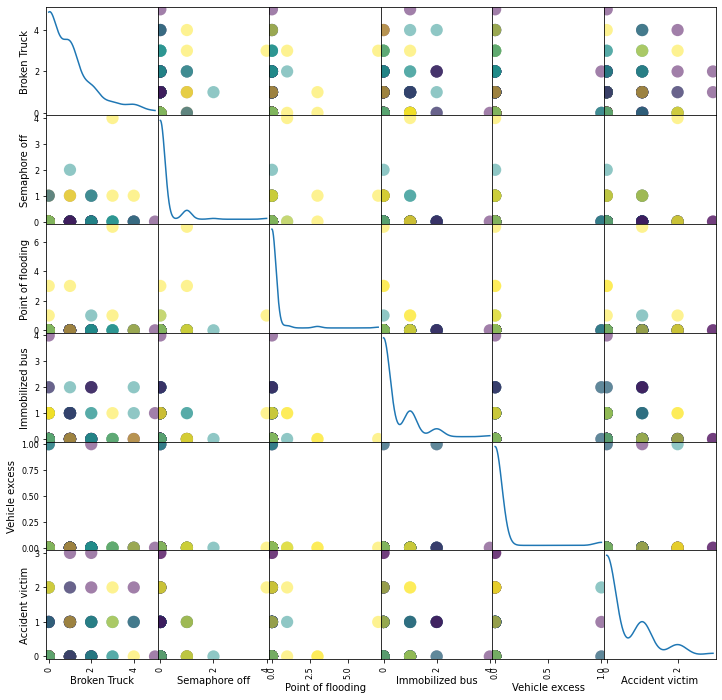

In [27]:
# lets explore above features
pd.plotting.scatter_matrix(df[names_features]
                           ,figsize=(12,12)
                           ,diagonal='kde'
                           ,c=df['Slowness in traffic (%)']
                           ,s=600);

In [29]:
x = df[names_features].values
y = df["Slowness in traffic (%)"].values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.2)

In [30]:
# let s train again with those three features
print('logistic regression')
lg = LogisticRegression(penalty='l2').fit(xtrain,ytrain)
print('Train score: ',lg.score(xtrain,ytrain))
print('Test score: ',lg.score(xtest,ytest))
print()

print('KNN')
knnclf = clf(xtrain,ytrain,KNeighborsClassifier(weights='distance'),params={'n_neighbors':[2,3,4,5,6,7,8,9]})
print()

print('SVM')
svc = clf(xtrain,ytrain,SVC(),params={'gamma':[0.1,0.2,0.4,0.8,1,1.5],
                                     'C':[0.3,0.5,0.8,1,1.5,1.8,2.0]})
print()


print('Random Forest Classifier')
rfclf = clf(xtrain,ytrain,RandomForestClassifier(random_state=1),
          params={'max_depth':[3,4,5,6],
                 'n_estimators':[100,150,200,250],
                 'min_samples_split':[2,3,4,5],
                 'min_samples_leaf':[2,3,4,5]})
print()


print('Gradient Boosting Classifier')
gbclf = clf(xtrain,ytrain,GradientBoostingClassifier(random_state=1),
          params={'max_depth':[3,4,5,6],
                 'n_estimators':[100,150,200,250],
                 'learning_rate':[0.001,0.01,0.1]})
print()


print('XGBoost')
xgboot =xgb.XGBClassifier(random_state=0,learning_rate=0.01,max_depth=5,gamma=4,eta=0.1) 
xgboot.fit(xtrain,ytrain)
print('Train score: ',xgboot.score(xtrain,ytrain))
print('Test score: ',xgboot.score(xtest,ytest))
print()

      
print('AdaBoost')
adaboostclf = clf(xtrain,ytrain,AdaBoostClassifier(random_state=1),
          params={'n_estimators':[100,150,200,250],
                 'learning_rate':[0.001,0.01,0.1]})

logistic regression
Train score:  0.6574074074074074
Test score:  0.4444444444444444

KNN
Best Params:  {'n_neighbors': 2}
Best Score:  0.6666666666666666

SVM
Best Params:  {'C': 0.8, 'gamma': 0.2}
Best Score:  0.6388888888888888

Random Forest Classifier
Best Params:  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score:  0.6296296296296297

Gradient Boosting Classifier
Best Params:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
Best Score:  0.6574074074074073

XGBoost
Train score:  0.5925925925925926
Test score:  0.5555555555555556

AdaBoost
Best Params:  {'learning_rate': 0.01, 'n_estimators': 100}
Best Score:  0.6481481481481481


In [31]:
adaboost = AdaBoostClassifier(random_state=1,learning_rate=0.01,n_estimators=100).fit(xtrain,ytrain)
print('Adaboost - Testing score',adaboost.score(xtest,ytest))
print()

gbdt = GradientBoostingClassifier(random_state=1,learning_rate=0.01,max_depth=3,n_estimators=150).fit(xtrain,ytrain)
print('GradientBoost - Testing score',gbdt.score(xtest,ytest))
print()

svm = SVC(C=1,gamma=0.2).fit(xtrain,ytrain)
print('SVM - Testing score',svm.score(xtest,ytest))
print()

knn = KNeighborsClassifier(n_neighbors=2).fit(xtrain,ytrain)
print('KNN - Testing score',knn.score(xtest,ytest))
print()

lg = LogisticRegression(penalty='l2').fit(xtrain,ytrain)
print('LogisticRegression - Testing score',lg.score(xtest,ytest))
print()

Adaboost - Testing score 0.37037037037037035

GradientBoost - Testing score 0.4074074074074074

SVM - Testing score 0.4074074074074074

KNN - Testing score 0.37037037037037035

LogisticRegression - Testing score 0.4444444444444444



[0.001, 0.021387755102040818, 0.041775510204081635, 0.062163265306122456, 0.08255102040816327, 0.10293877551020408, 0.12332653061224491, 0.1437142857142857, 0.16410204081632654, 0.18448979591836737, 0.20487755102040817, 0.225265306122449, 0.24565306122448982, 0.26604081632653065, 0.2864285714285714, 0.30681632653061225, 0.3272040816326531, 0.3475918367346939, 0.36797959183673473, 0.3883673469387755, 0.40875510204081633, 0.42914285714285716, 0.449530612244898, 0.4699183673469388, 0.49030612244897964, 0.5106938775510205, 0.5310816326530613, 0.551469387755102, 0.5718571428571428, 0.5922448979591837, 0.6126326530612245, 0.6330204081632653, 0.6534081632653062, 0.673795918367347, 0.6941836734693878, 0.7145714285714286, 0.7349591836734695, 0.7553469387755103, 0.775734693877551, 0.7961224489795918, 0.8165102040816327, 0.8368979591836735, 0.8572857142857143, 0.8776734693877551, 0.898061224489796, 0.9184489795918368, 0.9388367346938776, 0.9592244897959185, 0.9796122448979593, 1.0]


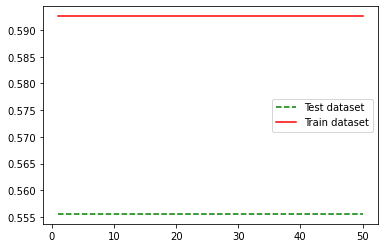

In [32]:
test_scores = []
train_scores = []
eta = []
steps = 50
for i in np.linspace(0.001,1,steps):
    xgboost =xgb.XGBClassifier(random_state=1,learning_rate=0.1,max_depth=3,gamma=4,eta=i).fit(xtrain,ytrain) 
    train_scores.append(xgboost.score(xtrain,ytrain))
    test_scores.append(xgboost.score(xtest,ytest))
    eta.append(i)
print(eta)
plt.plot(range(1,steps+1),test_scores,'g--',label='Test dataset')
plt.plot(range(1,steps+1),train_scores,'r-',label='Train dataset')
plt.legend()